In [ ]:
from mmpose.apis import (inference_bottom_up_pose_model, init_pose_model,
                         vis_pose_result)
from mmcv import Config
from mmpose.datasets import build_dataloader, build_dataset
from mmpose.datasets import DatasetInfo
from matplotlib import pyplot as plt
import os
import cv2

In [ ]:
checkpoint = '/mnt/ssd/marley/ID_Card/mmpose/work_dirs/overfit_higherhrnet_w32_IDCard_512x512/best_AP_epoch_4.pth'
config_file = '/mnt/ssd/marley/ID_Card/mmpose/configs/ID_card/overfit_higherhrnet_w32_IDCard_512x512.py'
cfg = Config.fromfile(config_file)

In [18]:
model = init_pose_model(cfg, checkpoint)
dataset_info = model.cfg.data['test'].get('dataset_info', None)
dataset_info = DatasetInfo(dataset_info)

Use load_from_local loader


In [19]:
images = [os.path.join('/mnt/ssd/marley/ID_Card/ID_card_data/val',img) for img in os.listdir('/mnt/ssd/marley/ID_Card/ID_card_data/val') if img.endswith('.jpg')]
dataset = build_dataset(cfg.data.test, dict(test_mode=True))

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
=> num_images: 3400


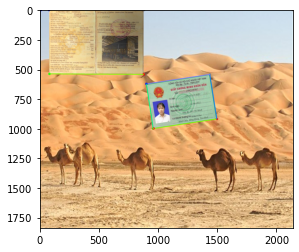

In [20]:
img = images[0]
keypoint_results, returned_outputs = inference_bottom_up_pose_model(model, img, 'BottomUpIDCardDataset', dataset_info, return_heatmap=True)
vis_result = vis_pose_result(model,
                             img,
                             keypoint_results,
                             radius=10,
                             thickness=5,
                             dataset=model.cfg.data.test.type,
                             show=False)
vis_result = cv2.cvtColor(vis_result, cv2.COLOR_BGR2RGB)
plt.imshow(vis_result)

In [21]:
returned_outputs[0]['heatmap'].shape

(1, 4, 512, 640)

In [22]:
import numpy as np
heatmap = returned_outputs[0]['heatmap'][0]

In [23]:
heatmap.shape

(4, 512, 640)

In [25]:

print(img.shape)

(512, 640, 3)


In [40]:
from skimage import exposure
img = cv2.resize(vis_result, (640, 512))
for slice in heatmap:
    map_img = exposure.rescale_intensity(slice, out_range=(0, 255))
    map_img = np.uint8(map_img) 
    heatmap_img = cv2.applyColorMap(map_img, cv2.COLORMAP_JET)
    img = cv2.addWeighted(heatmap_img, 0.3, img, 0.8, 0)

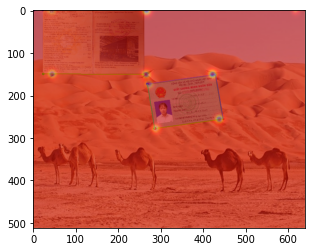

In [41]:
plt.imshow(img)

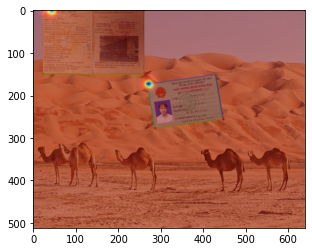

In [15]:
fin = cv2.addWeighted(heatmap_img, 0.5, img, 0.5, 0)
plt.imshow(fin)

In [14]:
fin.shape

(512, 640, 3)

In [49]:
heatmap = np.load('heatmap.npy', allow_pickle=True)

In [37]:
import seaborn as sns

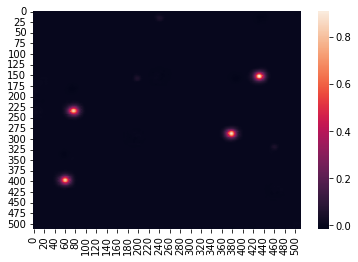

In [38]:
ax = sns.heatmap(heatmap[0][2])